# Introduction

For this project I choose the Stack Overflow Developer Survey, 2017 using the CRISP-DM Process of:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

Link to dataset: https://www.kaggle.com/datasets/stackoverflow/so-survey-2017

# Business Understanding

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. This year, they amassed more than 64,000 responses fielded from 213 countries. I have several questions to explore insights of this dataset

- Which country has the largest survey respondent?
- Which professional has the largest number of respond of this survey? 
- What is the average years of experience of all developer?
- Is there any relation between Education and Salary?

# Import Libraries

In [215]:
# Used for data analyzing
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Used for reading CSV file saved in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

## 1. Data Inspection

In [216]:
# Read dataset into DataFrame
df = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')

In [217]:
# Test
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
# Check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [219]:
# Provide statistics of each column
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [220]:
# Check dupicates
sum(df.duplicated())

0

In [221]:
# Check number of NaN values on each columns
df.isna().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [222]:
# Provide statistics of a column. In this case is column `Professional`
stats = df.Professional.value_counts().reset_index()
stats.columns = ['Professional', 'No. of records']
stats

,Professional,No. of records
0,Professional developer,36131
1,Student,8224
2,Professional non-developer who sometimes write...,5140
3,Used to be a professional developer,983
4,None of these,914


## 2. Data Quality & Tidiness

In [223]:
# Create a copy DataFrame
clean_df = df.copy()

In [224]:
# Test
clean_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1 Data Quality

- After checking all column data type, i can confirm that the data type of each column in the approriate format. No need to perform any transformation.

### 2.2 Data Tidiness

#### Issue #1: Concatenate columns and Remove redundant columns

- `DeveloperType, WebDeveloperType, MobileDeveloperType, NonDeveloperType` are 4 columns defined the type of that developer or simply their job title. A developer can have not just one but multiple job titles.
- But, it is no need to expand to 4 columns just to display a single job title. We can combine these columns into one (1) column. If someone has more than one title, just seperate the job title with comma

In [225]:
# Drop all NaN values (in case of that developer has only one job title and the others can be NaN)
# Then use regex \W to remove all non-alphabet characters in the result
clean_df['Job Title'] = clean_df[['DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType']].apply(lambda x: ''.join(str(x.dropna().values)), axis=1).str.replace(r"\W", ' ', regex=True)

In [226]:
# Drop old columns
clean_df.drop(['DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType'], axis=1, inplace=True)

In [227]:
# Test
clean_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,Job Title
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,Other
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,Data scientist
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile developer Graphics programming Desk...


#### Issue #2: Fill in NaN values

- When checking statistics of each column, we saw that many columns have NaN values that need to be filled
- For numerical columns, we will fill in value zero (0)
- For categorical columns, we will fill in string `Unknown`

In [228]:
# Collect numeric columns name
colnames_numerics_only = clean_df.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['Respondent',
 'CareerSatisfaction',
 'JobSatisfaction',
 'HoursPerWeek',
 'StackOverflowSatisfaction',
 'Salary',
 'ExpectedSalary']

In [229]:
# Fill NaN for each column
for col_name in colnames_numerics_only:
  clean_df[col_name].fillna(0, inplace=True)

In [230]:
# Test
clean_df[colnames_numerics_only]

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,1,0.0,0.0,0.0,9.0,0.0,0.0
1,2,0.0,0.0,0.0,8.0,0.0,37500.0
2,3,8.0,9.0,0.0,8.0,113750.0,0.0
3,4,6.0,3.0,5.0,10.0,0.0,0.0
4,5,6.0,8.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
51387,51388,7.0,3.0,5.0,9.0,58000.0,0.0
51388,51389,0.0,0.0,0.0,7.0,0.0,0.0
51389,51390,10.0,10.0,0.0,0.0,0.0,0.0
51390,51391,6.0,7.0,1.0,9.0,40000.0,0.0


In [231]:
# Collect categorical columns name
colnames_categorical_only = clean_df.select_dtypes(include=object).columns.tolist()
print("Total categorical columns: ", len(colnames_categorical_only))

Total categorical columns:  144


In [232]:
# Fill NaN for each column
for col_name in colnames_categorical_only:
  clean_df[col_name].fillna('Unknown', inplace=True)

In [233]:
# Test
clean_df[colnames_categorical_only].head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Job Title
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,Unknown,Unknown,Unknown,Unknown,...,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,
1,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,Other
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,Data scientist
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Mobile developer Graphics programming Desk...


# Data Visualization

### Question 1: Which country has the largest survey respondent?

- This chart will let us know which country has the largest number of respondent and opposite is the least number

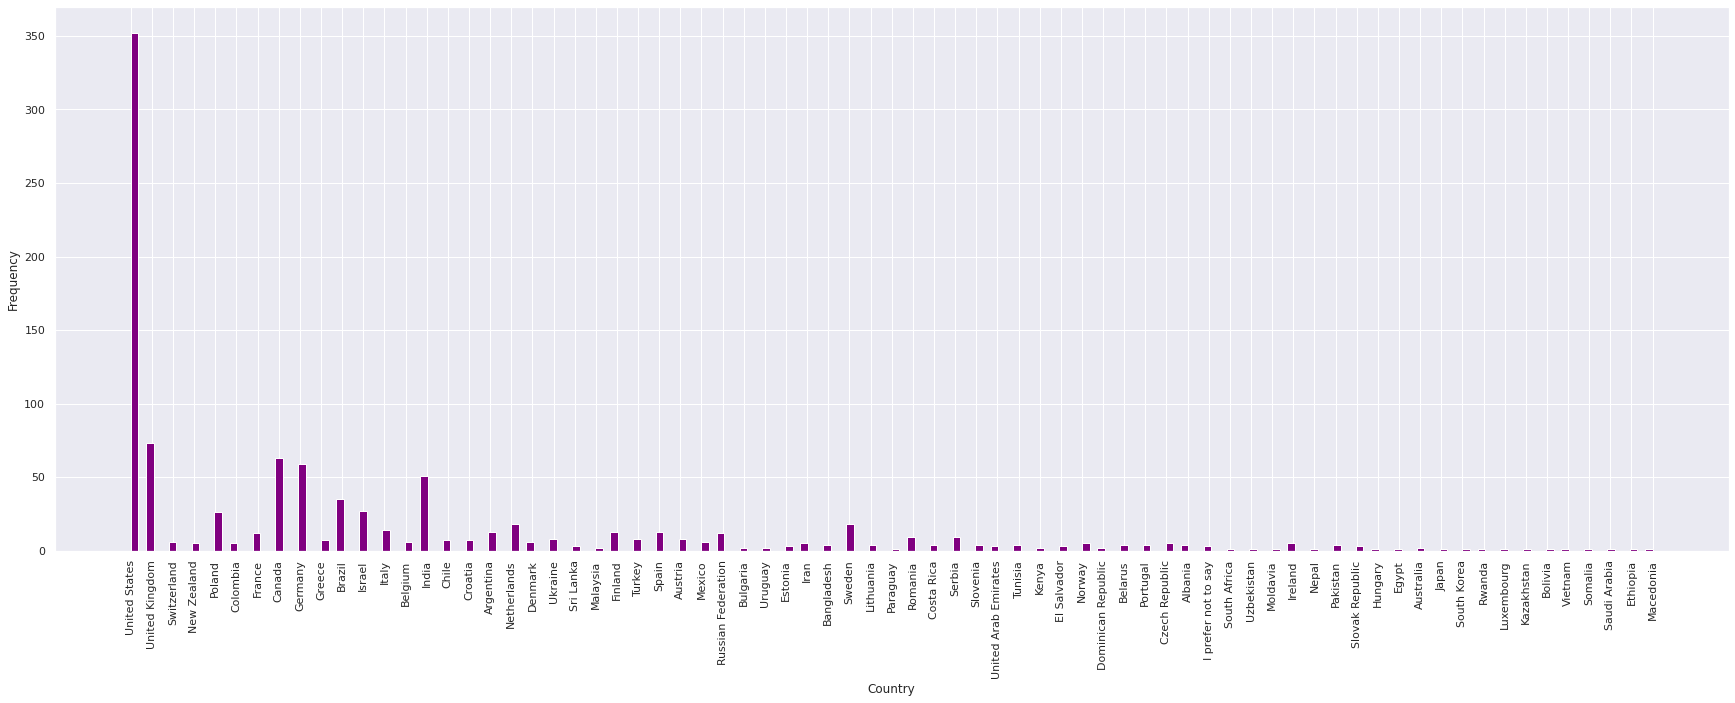

In [234]:
# plot the distribution of points
plt.figure(figsize=(30,10))
plt.hist(data = clean_df[:1000], x = 'Country', bins = 200, color = 'purple')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Frequency');

- We can see the largest number of respondents come from United States  and the smallest is Paraguay
- Because the dataset is quite large so i just use only 1000 records


### Question 2: Which professional has the largest number of respond of this survey? 

- This chart will let us know which occupation has the largest number of respondent and opposite is the least number

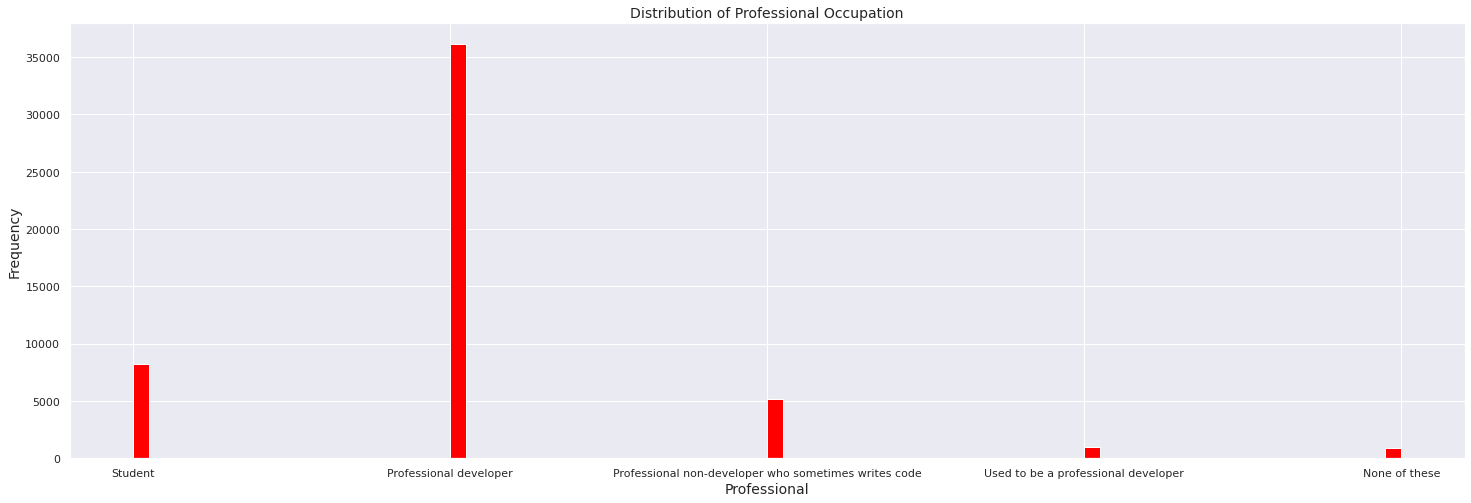

In [235]:
# plot the distribution of points
plt.figure(figsize=(25,8))
plt.hist(data = clean_df, x = 'Professional', bins = 80, color = 'red')
plt.title('Distribution of Professional Occupation', fontsize = 14)
plt.xlabel('Professional', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14);

- We can see the largest number of respondents is being Professional developer and the smallest is Used to be a professional developer


### Question 3: What is the average years of experience of all developer?

- This chart will let us know the average years of experience of all developer

Text(0, 0.5, 'Frequency')

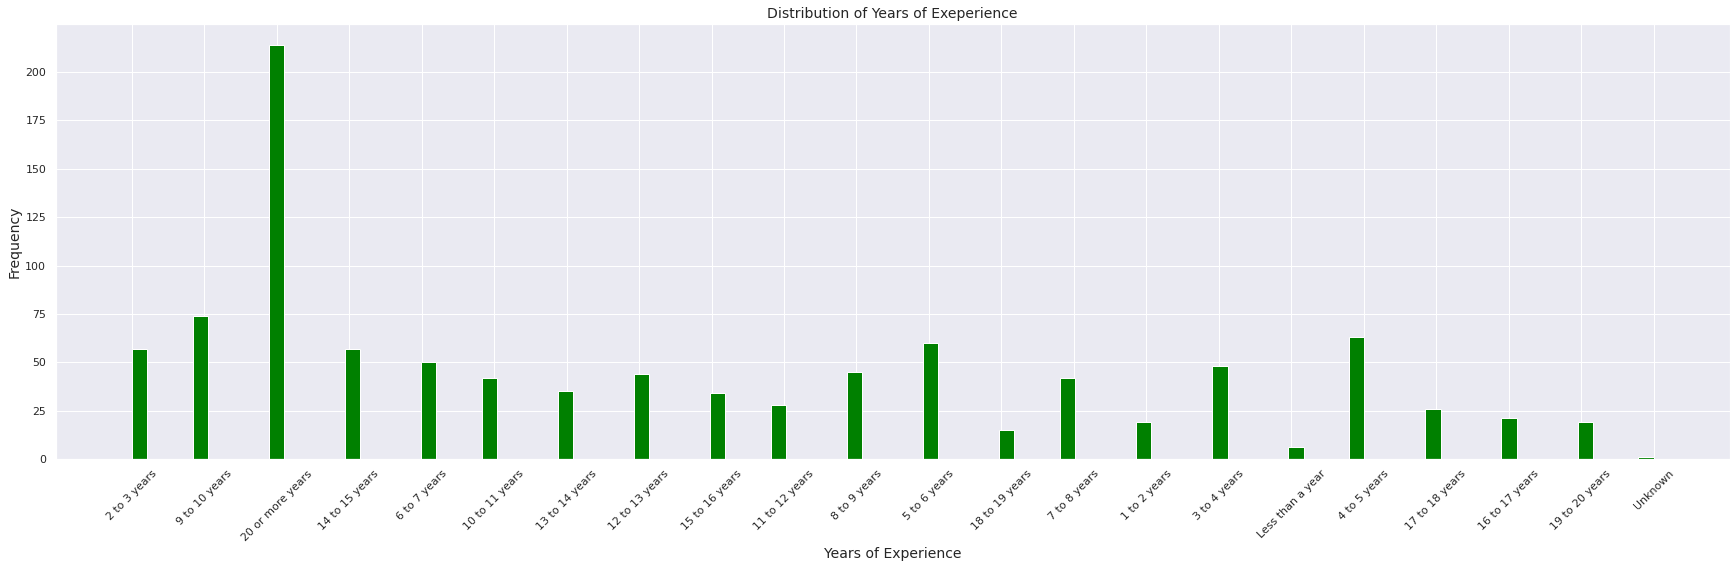

In [236]:
# plot the distribution of points
plt.figure(figsize=(30,8))
plt.hist(data = clean_df[:1000], x = "YearsProgram", bins = 100, color = 'green')
plt.title('Distribution of Years of Exeperience', fontsize = 14)
plt.xticks(rotation = 45)
plt.xlabel('Years of Experience', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

- We can see the average years of experience of developers that took part in the survey is 20 or more years


### Question 4: Is there any relation between Education and Salary?

This boxplot will help us find out that any relation between the Education Rank and Salary of the developer.

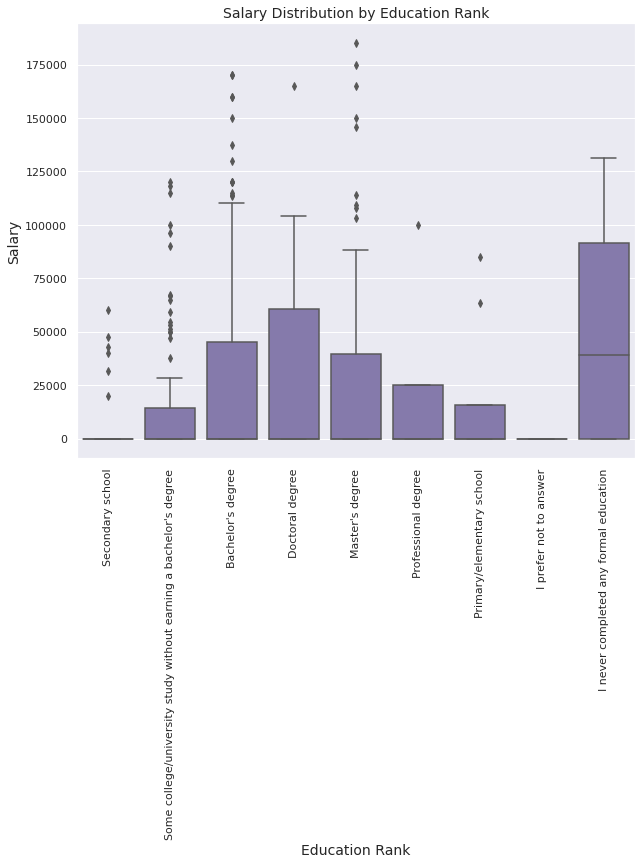

In [241]:
plt.figure(figsize=(10,8))
base_color = sns.color_palette()[4]
sns.boxplot(data = clean_df[:500], x = 'FormalEducation', y = 'Salary', color = base_color)
plt.title('Salary Distribution by Education Rank', fontsize = 14)
plt.xlabel('Education Rank',fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.xticks(rotation=90);

- Doctoral degree has the highest maximum salary, despite of having many outliers